# Language Processing 1 (fall 2023)

## Regular expression

## Assignment 1: assigned on October 5, 2023  and  to be returned on October 19, 2023, 23:55.

#### Your solutions will be evaluated in a holistic way. The percentages assigned to the exercises are provided to give you an idea of the time/effort it might take to solve them.  

## Exercise 1 (35%):

 - 1.1 (5%) Download from https://www.gutenberg.org/cache/epub/41/pg41.txt  (the file's encoding is utf-8)   "The Sleepy hollow" and write a new file "sleepy.txt" which only contains the text following the line "*** START OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW \*\*\*" and preceding the line "*** END OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***". 
 

In [1]:
# Insert your code below:
###########download file########
# load a file from Internet. 加载网上的文件。下载网上的文件。
from urllib import request
url = 'https://www.gutenberg.org/cache/epub/41/pg41.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(raw[:75])
##########slice wanted content########
start_flag = '*** START OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***'
end_flag = '*** END OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***'
start_index = raw.find(start_flag)
end_index = raw.rfind(end_flag)
print(start_index)
print(end_index)
print(raw[start_index: start_index + len(start_flag)])
print(raw[end_index: end_index + len(end_flag)])
##########write into a local file########
with open('sleepy.txt', 'w') as f:
    f.write(raw[start_index + len(start_flag): end_index])


The Project Gutenberg eBook of The Legend of Sleepy Hollow
    
This ebo
710
71707
*** START OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***
*** END OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***


 - 1.2 (15%) Write your own tokenizer and stemmer for English and apply them to  "sleepy.txt". You must use regular expressions and the results must be written to the files "tok.txt" and "stem.txt". Comment your programs.

In [9]:
import re
# insert your code below. TIP: write a function my_tokenizer(text,ud_text) and  
def my_tokenizer(text,ud_text=None):
    pattern = r'''(?x)   # set flag to allow verbose regexps 
    (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A. 
    | \w+(?:-\w+)*       # words with optional internal hyphens 
    | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82% 
    | \d+\.\d+           # numbers, e.g. 1.2
    | \d+                # integers, e.g. 12345
    | \w{1,}             # words
    |[\S]+               # punctuations 
    '''
    return list(re.findall(pattern, text))
    
def my_stemmer(text, ud_text=None):
    '''
    A function: my_stemmer 
    Ref: suffixes from https://www.yourdictionary.com/articles/suffix-examples
    '''
    suffixes=["ee","eer","er","ion","ism","ity","ment","ness","or",
              "sion","ship","th","able","ible","al","ant","ary","ful",
              "ic","ious","ous","ive","less","y","ed","en","er",
              "ing","ize","ise","ly","ward","wise"]
    stemmed_text = []
    flag = False
    for word in text:
        flag = False # False means not found suffixes
        for suffix in suffixes:
            if word.lower().endswith(suffix):
                stemmed_text.append(word[:-len(suffix)])
                flag = True # found a suffix
                break
        if not flag: # if not found a suffix
            stemmed_text.append(word)
    return stemmed_text
    
# then call the former with "sleepy.txt" and 
# write to the file "tok.txt" 
with open("sleepy.txt", 'r') as source_file:
    text = source_file.read()
    tokens = my_tokenizer(text)
    with open("tok.txt", 'w') as target_file:
        target_file.write('\n'.join(tokens))

    # the latter with "tok.txt". 
    # write to the file "stem.txt"
    stemmed_tokens = my_stemmer(tokens)
    with open("stem.txt", 'w') as target_file:
        target_file.write('\n'.join(stemmed_tokens))



 -  1.3 (5%) Run on sleepy.txt the  NLTK word-tokenizer. Describe shortly the differences between the results produced by your tokenizer and those by the NLTK word-tokenize.
Add your description below:

In [3]:
import nltk
with open("sleepy.txt", 'r') as source_file:
    text = source_file.read()
    tokens_nltk = set(nltk.word_tokenize(text))
    tokens_mine = set(my_tokenizer(text))
    print('tokens_nltk - tokens_mine: ', tokens_nltk.difference(tokens_mine))
    print('tokens_mine - tokens_nltk: ', tokens_mine.difference(tokens_nltk))

# results:
# the most obvious differences are that 
# 1. NLTK tokenizer handles abbreviations like 'MR.', 'St.' etc. Whereas, my_tokenizer can not.
# 2. NLTK tokenizer handles tokens starting with punctuations like '“sugared', '--he'. etc. Whereas my_tokenizer can not.
    

tokens_nltk - tokens_mine:  {'t', 'Faith', 'jerk', '(', 'doing', 'child.', 'Spare', 'live.', '“', 'd', 'MR.', 'quilting', ')', 'Ay', 's-ears', 'sugared', 'History', 'provided', 'state.', 'St.', 's', 'themselves.', '”', 'safe.', 'Ergo', 'sparking', 'Who', 'tarried', 'yielding', 'myself.', 'fall'}
tokens_mine - tokens_nltk:  {'’d', '“Who', ',--for', '--provided', '“fall', '“Faith,', ',”', '“Ergo,', 'live', '--Heaven', '’s,', '--there', ',--an', '“sugared', '’s;', '!--but', '’s', '’;', '“Spare', ',--the', '--when', ';”', '’t', '?”', '--but', '!)', '--he', '--a', '--his', 'St', ',--he', '’s-ears;', '“doing', 'myself', '“Ay,', '“as', '“in', '“I', '(unskilful', '“tarried,”', '“History', '“he', '--yielding,', '“If', '“double', '“sparking,”', ',--by', '“That,', 'MR', '“New', '“by', 'safe', '“That', '“quilting', '--jerk!--he', ',--and', '.”', ',--sometimes', '!”', ',--or'}


#### 1.4a-b (10%)
 
 - 1.4a Run the NLTK Lancaster stemmer on the normalized sleepy.txt. 


 - 1.4b Describe shortly the differences between the results produced by your stemmer on sleepy.txt and those returned by the NLTK  Lancaster stemmer applied to the same text. Add your description below:

In [4]:
# add your code hereunder:
import nltk
with open("sleepy.txt", 'r') as source_file:
    text = source_file.read()
    tokens = nltk.word_tokenize(text)
    stemmed_text_mine = set(my_stemmer(tokens))
    lancaster = nltk.LancasterStemmer()
    stemmed_text_nltk = set([lancaster.stem(t) for t in tokens])
    # print(nltk.tokenwrap(stemmed_text_nltk))
    print('stemmed_text_nltk - stemmed_text_mine: \n', stemmed_text_nltk.difference(stemmed_text_mine))
    print('stemmed_text_mine - stemmed_text_nltk: \n', stemmed_text_mine.difference(stemmed_text_nltk))

'''
results:
1 my_stemmer can not handle plural forms, e.g. 'cows', etc..
2 nltk.LancasterStemmer can not handle words like 'downhill', 'mile', etc..
'''

stemmed_text_nltk - stemmed_text_mine: 
 {'inh', 'abraham', 'murm', 'num', 'cava', 'quav', 'extrav', 'money', 'want', 'burn', 'nine-pounder', 'hendrick', 'resid', 'sometim', 'lesson', 'iv', 'lofty', 'they', 'anacond', 'buckl', 'well-broken', 'oh', 'dwel', 'fool', 'pertin', 'katrin', 'mar', 'slapjack', 'comrad', 'sprawling', 'uneasy', 'flog', 'chimney', 'dismay', 'rantipol', 'festoon', 'middl', 'lif', 'nicknam', 'absolv', 'rud', 'fret', 'corduroy', 'england', 'meddlesom', 'palac', 'despit', 'mid-heaven', 'count', 'glassy', 'prop', 'cossack', 'pep', 'tassel', 'wil', 'perpendicul', 'uncourt', 'prud', 'app', 'slic', 'long-established', 'ichabod', 'brunt', 'homeward', 'fast', 'bridl', 'enrapt', 'loos', 'exceiv', 'ide', 'adjac', 'doubtless', 'extrem', 'mil', 'stretched', 'som', 'purpl', 'strolled', 'basket', 'becam', 'equip', 'headless', 'precip', 'half-broken', 'heavy-hearted', 'lady', 'chick', 'bel', 'giant', 'conduc', 'spect', 'extract', 'whatev', 'aj', 'reliev', 'say', 'swain', 'sug', 'c

"\nresults:\n1 my_stemmer can not handle plural forms, e.g. 'cows', etc..\n2 nltk.LancasterStemmer can not handle words like 'downhill', 'mile', etc..\n"

## Exercise 2 (15%): 

 - Normalize  and PoS-tag the text  "sleepy.txt" with the NLTK Penn PoS tagger and the Universal Dependency PoS tagger (5%). Explain the differences between the two tagsets and in which cases you think it would be best to use the Penn PoS tagger and in which cases the universal Dependency one (10%). 

In [5]:
# insert and run your code calling the two pos-tags, below.
with open("sleepy.txt", 'r') as source_file:
    text = source_file.read().lower()
    tokens = nltk.word_tokenize(text)
    lancaster = nltk.LancasterStemmer()
    stemmed_tokens = [lancaster.stem(t) for t in tokens]
    print(nltk.pos_tag(stemmed_tokens)) # It uses the Penn Treebank tagset by default.
    print(nltk.pos_tag(stemmed_tokens, tagset='universal'))

    


[('the', 'DT'), ('legend', 'NN'), ('of', 'IN'), ('sleepy', 'NN'), ('hollow', 'NN'), ('by', 'IN'), ('washington', 'NN'), ('irv', 'NN'), ('found', 'VBD'), ('among', 'IN'), ('the', 'DT'), ('pap', 'NN'), ('of', 'IN'), ('the', 'DT'), ('lat', 'JJ'), ('diedrich', 'NN'), ('knickerbock', 'NN'), ('.', '.'), ('a', 'DT'), ('pleas', 'JJ'), ('land', 'NN'), ('of', 'IN'), ('drowsy', 'JJ'), ('head', 'NN'), ('it', 'PRP'), ('was', 'VBD'), (',', ','), ('of', 'IN'), ('dream', 'NN'), ('that', 'IN'), ('wav', 'VBZ'), ('bef', 'VB'), ('the', 'DT'), ('half-shut', 'JJ'), ('ey', 'NN'), (';', ':'), ('and', 'CC'), ('of', 'IN'), ('gay', 'JJ'), ('castl', 'NN'), ('in', 'IN'), ('the', 'DT'), ('cloud', 'NN'), ('that', 'WDT'), ('pass', 'NN'), (',', ','), ('forev', 'JJ'), ('flush', 'NN'), ('round', 'NN'), ('a', 'DT'), ('sum', 'NN'), ('sky', 'NN'), ('.', '.'), ('castl', 'NN'), ('of', 'IN'), ('indol', 'NN'), ('.', '.'), ('in', 'IN'), ('the', 'DT'), ('bosom', 'NN'), ('of', 'IN'), ('on', 'IN'), ('of', 'IN'), ('thos', 'NN'), ('

 - Insert your explanation about the differences between the two tagsets and your thoughts about their use, below:


Difference:
1. the tags between two tag-sets are different.   
  Take noun as example. Noun is NOUN in Penn Treebank tagset and is NN in Universal tagset.add   
2. Penn tagset has 36 tags. And, Universal tagset has 17 tags.   
3. The most popular "tag set" for POS tagging for American English is probably the Penn tag set. (From wikipedia)   

Since Penn tagset has much more tags, it is more detailed about part-of-speech and offers more information about a language.
That information makes it more suited for tasks like syntatic parssing, lexical semantics and historical liguistics.

The Universal tagset has less tags but it can be used in different languages. This allows cross-lingual processing available.
So, the Universal tagset is more suitable for tasks like machine translation, multilingual NLP and low-resource languages.



## Exercise 3 (15%):

 - 3.1 (5%) Calculate, and print out: a)  the absolute word frequency of the 20 most frequent words in "sleepy.txt", b) and their relative frequency. c) Plot the cumulative frequency of the 20 words.

[(',', 1069), ('the', 920), ('of', 601), ('and', 512), ('a', 362), ('.', 318), ('his', 257), ('in', 251), ('to', 248), ('was', 203), ('he', 191), (';', 174), ('with', 145), ('that', 119), ('it', 101), ('by', 88), ('on', 88), ('as', 84), ('had', 84), ('at', 82)]
[(',', 0.07654851414249911), ('the', 0.06587898317221626), ('of', 0.04303616183315431), ('and', 0.036663086287146436), ('a', 0.025921947726459005), ('.', 0.022771213748657357), ('his', 0.018403150733977802), ('in', 0.017973505191550304), ('to', 0.017758682420336555), ('was', 0.014536340852130326), ('he', 0.013677049767275332), (';', 0.012459720730397422), ('with', 0.010383100608664519), ('that', 0.008521303258145364), ('it', 0.007232366630862871), ('by', 0.006301467955603294), ('on', 0.006301467955603294), ('as', 0.006015037593984963), ('had', 0.006015037593984963), ('at', 0.005871822413175797)]


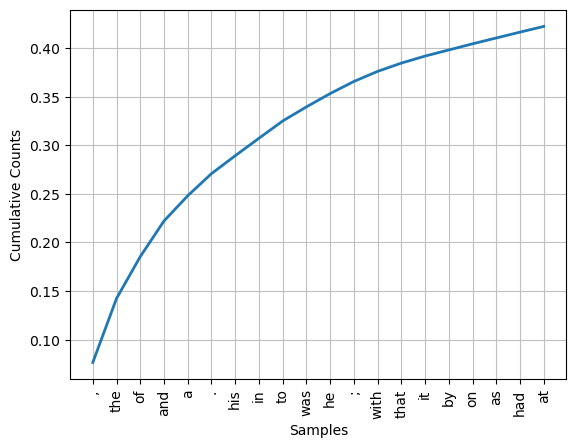

In [6]:
import nltk
from matplotlib import pyplot as plt
#insert your code below
# a)  the absolute word frequency of the 20 most frequent words in "sleepy.txt", 
with open("sleepy.txt", 'r') as source_file:
    text = source_file.read().lower()
    tokens = nltk.word_tokenize(text)
    # Get the statistics of a document. 单词统计。获得单词词频。
    freq_dist = nltk.FreqDist(tokens)
    # print(nltk.tokenwrap(freq_dist.most_common(20)))
    print(freq_dist.most_common(20))
    # b) and their relative frequency. 
    token_size = len(tokens)
    for token in freq_dist:
        freq_dist[token] = freq_dist[token] / token_size
    print(freq_dist.most_common(20))
    # c) Plot the cumulative frequency of the 20 words.
    freq_dist.plot(20, cumulative=True) 



 -  3.2 (10%) What do the three different measures tell us? Insert your answer below:


The fequency distribution shows how many times a word accords in a given text. It is an absolute figure that will change with the length or types of a text.

The relative frequency distribution shows the ratio of a word to the number of words in the text. This indicator dose not change too much when the text length or type changes. It is a text-length-agnostic statistic method, so, it is a better indicator for comparing different texts.

The graph gives us an intuitive result of the previous two methods. 

## Exercise 4 (15%):

 - Find and print the lemmas of sleepy.txt after having normalised the text. Write the results in the file sleepy-lemmas.txt so that each word is separated by its lemma by a backsash, e.g. This/this is/be an/a example/example.

In [7]:
# Stemming and Lemmatization in Python NLTK are text normalization techniques for Natural Language Processing.
import nltk
# insert your code below
with open("sleepy.txt", 'r') as source_file:
    text = source_file.read()
    tokens = nltk.word_tokenize(text)
    wnl=nltk.WordNetLemmatizer() 
    lemmas = [wnl.lemmatize(t.lower()) for t in tokens] # lemmatization
    with open('sleepy-lemmas.txt', 'w') as target_file: 
        for i in range(len(lemmas)): # visit every element by indexes
            if str(lemmas[i]).isalpha(): # if the token is a word 
                target_file.write(tokens[i] + '/' + lemmas[i] + '\n')
            else:
                target_file.write(tokens[i] + '\n')

## Exercise 5 (20%)

 -  5.1 (15%) Extend the pattern based tagger from the NLTK book and lesson 4 exercise to cover all pronouns, punctuation signs (tag ".", coordinating conjunctions (tag "CC"), modal auxiliary (tag "MD") and who-words (tag "WH"). Run the tagger om sleepy.txt and write the results in a file "my_sleepy-tagget.txt.  


In [8]:
#insert your code here  
patterns = [
    (r'I|me|he|she|him|her|it|we|us|you|they|them', 'PRP'), # pronouns
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'\w+(?:-\w)+', 'NN'),            # compound nouns
    (r'.*(?:tion|ity|er|ness|ism|ment|ant|ship|age|ery)$', 'NN'),
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'can|could|may|might|must|will|would|shall|should', 'MD'), # modal auxiliary (tag "MD")
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'[][.,;\"\'?():-_`]', '.'),      # unctuation signs
    (r'and|but|or|yet|for|nor|so', 'CC'), # coordinating conjunctions (tag "CC")
    (r'who\w*', 'WH'),                 # who-words (tag "WH")
    (r'.*', 'NN'),                     # nouns (default)
    ]

with open("sleepy.txt", 'r') as source_file:
    text = source_file.read().lower()
    tokens = nltk.word_tokenize(text)
    # tagging a token with the help of regular expression. 通过正则表达式进行词性标注。
    regexp_tagger = nltk.RegexpTagger(patterns) 
    pos_tagged_tokens = regexp_tagger.tag(tokens)
    with open('my_sleepy-tagget.txt', 'w') as target_file:
        for item in pos_tagged_tokens:
            target_file.write(str(item) + '\n')


 -  5.2  (5%) Look at the obtained results and explain which word types are still not tagged correctly. Insert your explanation below:

Prepositions are not tagged correctly. For example, 'of'.
Determiners are not tagged correctly. For example, 'the'.
Name is not tagged correctly. For example, 'irving'.
Some adjectives are not tagged correctly. For example, 'drowsy', 'pleasing', etc..
Some -ing words are not tagged correctly. For example, 'promising'.

Because we use NN as default tag, and did not encompass all the POS types in the pattern.
Also, due to the overlapipng of some word type, we need the context of a word to determine its POS. For example, 'promising' is an adjective but it has an -ing suffix and is tagged as 'VBG'.
